In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt

import read_region as rr

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rc('font', family='serif', size=11)

In [2]:
def standardize(X):
    Xmin = np.min(X, axis=tuple([0, 2, 3])).reshape(1, X.shape[1], 1, 1)
    Xmax = np.max(X, axis=tuple([0, 2, 3])).reshape(1, X.shape[1], 1, 1)
 
    return (X - Xmin)/(Xmax - Xmin)

def square_data(X):
    nnew  = min(X.shape[2], X.shape[3])
    return X[:, :, 0:nnew, 0:nnew]

def imshow16(X, figsize=(8, 4)):
    fig, axs = plt.subplots(4, 4, figsize=figsize)
    [ax.set_axis_off() for ax in axs.ravel()]

    c = 0
    for i in range(4):
        for j in range(4):
            im = axs[i, j].imshow(X[:,c:c+1,...].reshape(X.shape[-2], X.shape[-1]), 
                                  interpolation='nearest', cmap='viridis')
            c += 1

    fig.tight_layout()
    fig.colorbar(im, ax=axs.ravel().tolist())

    plt.show()
    
def showfile(filename, square=False):
    if not os.path.exists(filename):
        print('ERROR: path to file does not exist!')
    else:
        cData = rr.read_region(filename, channels=True, geo=False, retrievals=False)

        X = np.array(cData['c00'])
        X = np.expand_dims(np.moveaxis(X, 2, 0), axis=0)
        
        figsize = (8, 4)
        
        if square or 'east' in filename:
            X = square_data(X)
            figsize = (6, 5)
        
        X = standardize(X)
        
        imshow16(X, figsize=figsize)

In [3]:
volume = '/Volumes/Stock External/development/GOES-dataset'

## Northern Atlantic Ocean

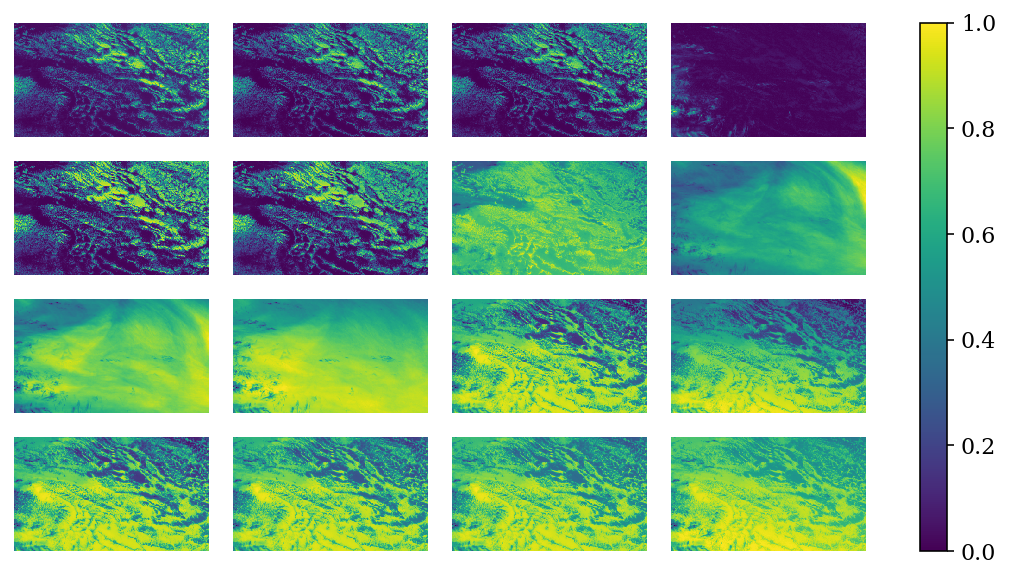

In [4]:
showfile(volume + '/natlantic/natlantic_goes16_2017_325_1605.nc')

## Eastern Pacific Ocean

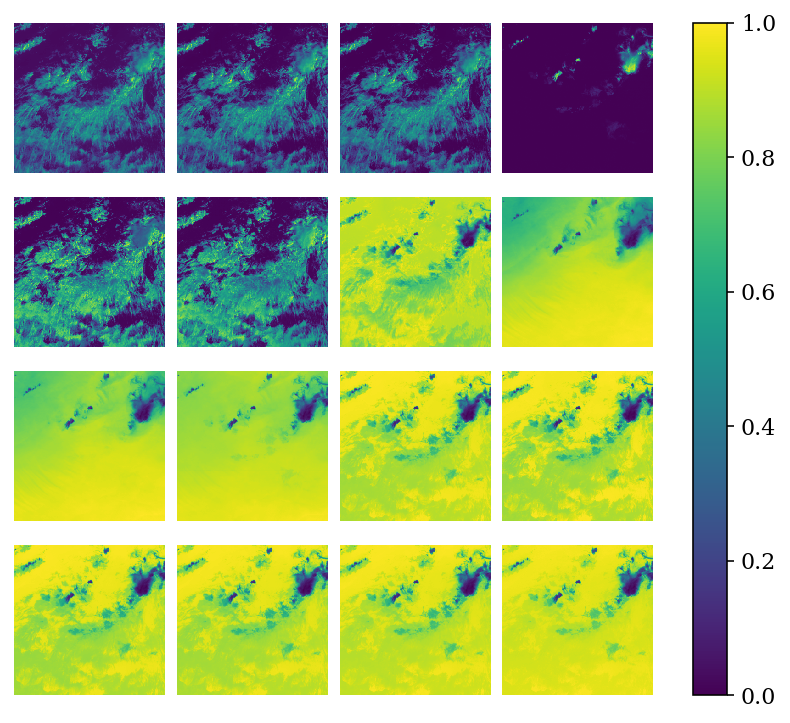

In [5]:
showfile(volume + '/eastpac/eastpac_goes16_2017_315_1430.nc')